<a id='1'></a><center> <h1 style="background-color:orange; color:white" ><br>Netflix Data Analysis<br></h3>
<b>by Krishna Bahadur</b>

# Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix1.csv")

Loading the info about the dataset

In [3]:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# Data Cleaning

In [6]:
# Check for NULL Values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
grouped_by_type = df.groupby(['type']).size().to_frame(name='count').reset_index()

# Print the grouped dataframe
print(grouped_by_type)

      type  count
0    Movie   6126
1  TV Show   2664


# Convert Date Time format

In [8]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [9]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,25,2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",22,2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,2021,9


In [10]:
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
day_added         31
year_added        14
month_added       12
dtype: int64

In [11]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,25,2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",22,2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,2021,9


# Content Type Distribution

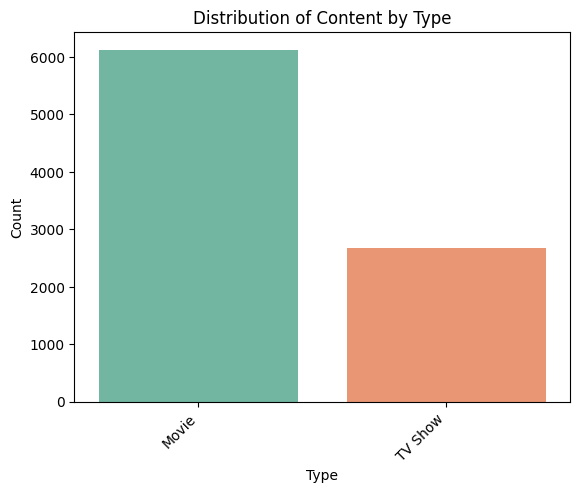

In [12]:
type_counts = df['type'].value_counts()
sns.barplot(
    x=type_counts.index,  
    y=type_counts.values, 
    hue=type_counts.index,  
    palette='Set2'  
)
plt.title('Distribution of Content by Type')  
plt.xlabel('Type')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.xticks(rotation=45, ha='right')  

plt.show() 


Number of titles released each year:


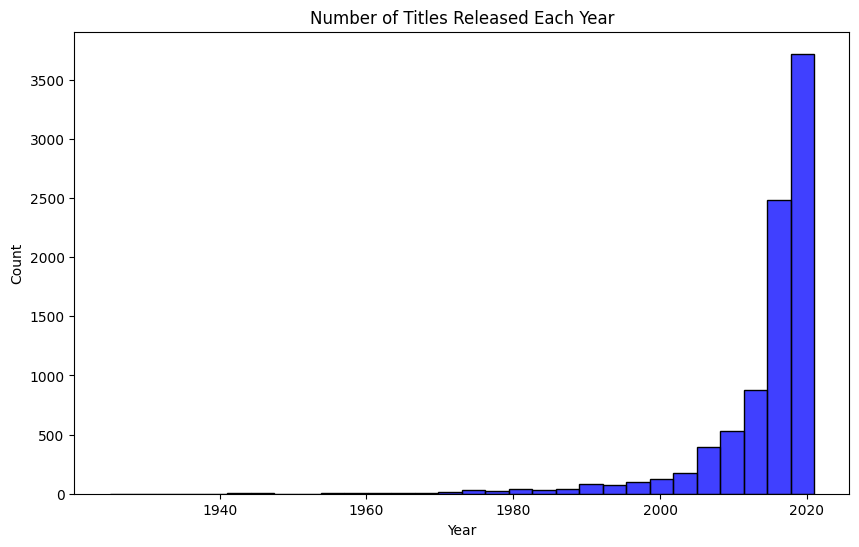

In [13]:
print("\nNumber of titles released each year:")
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], kde=False, bins=30, color='blue')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<b>Monthly releases of Movies and TV shows on Netflix</b>

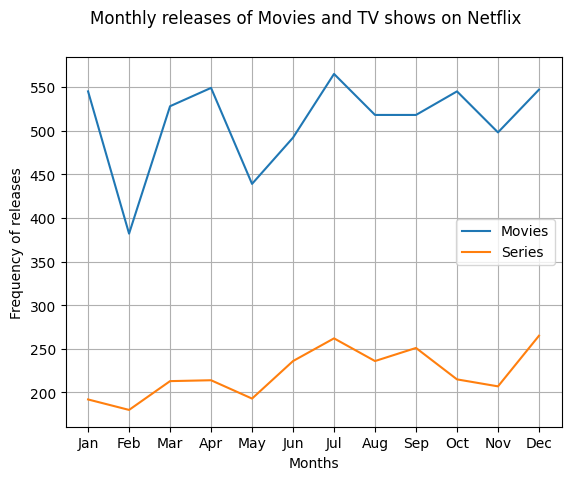

In [14]:
monthly_movie_release=df[df['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month_added'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

<b>Generic Analysis</b>

In [15]:
top_genres = df['listed_in'].value_counts().head(10)
print(top_genres)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


<b>Top 10 Genere</b>

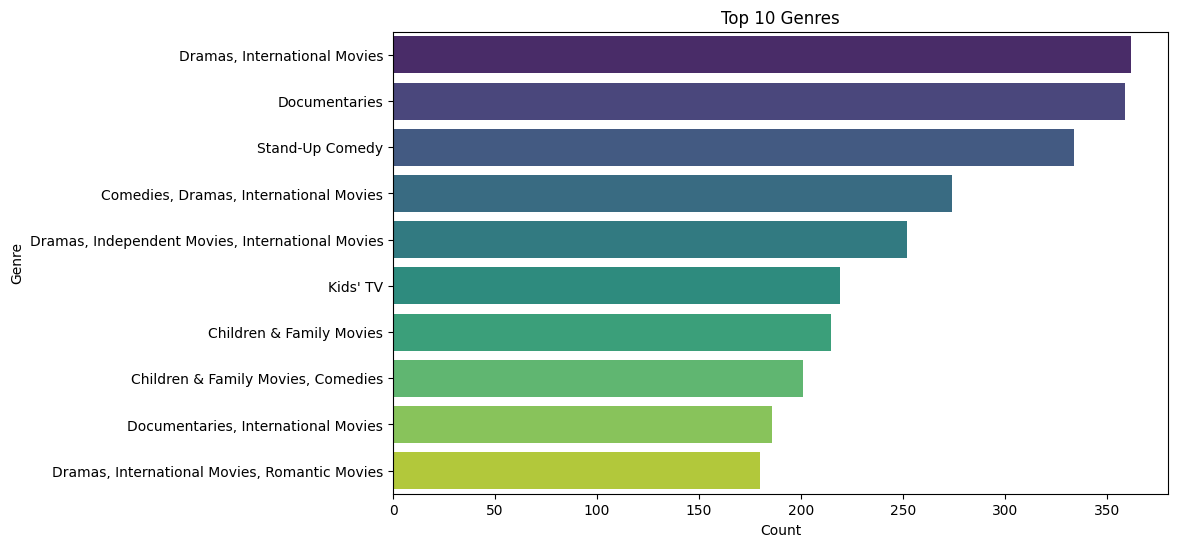

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, hue=top_genres.index, palette='viridis', legend=False)  
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<b> Duration Analysis (for Movies)</b>

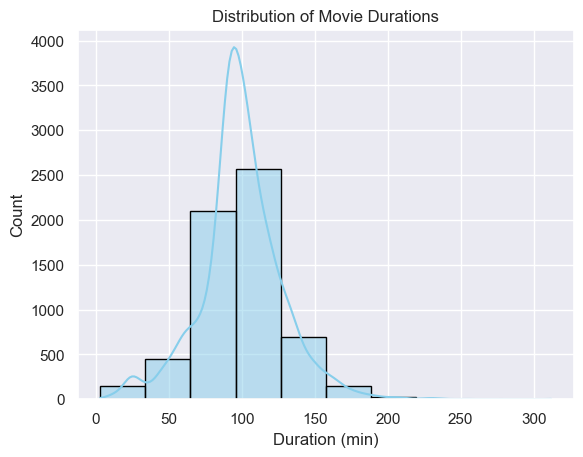

Mean duration: 99.58


In [17]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies.loc[:, 'duration'] = df_movies['duration'].str.replace(' min', '', regex=False).astype(int)
mean_duration = df_movies['duration'].mean()
num_bins = 10

sns.set_theme(style="darkgrid")
sns.histplot(data=df_movies['duration'], bins=num_bins, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Count')

plt.show()

print(f'Mean duration: {mean_duration:.2f}')

<b>Country Wise Analysis</b>

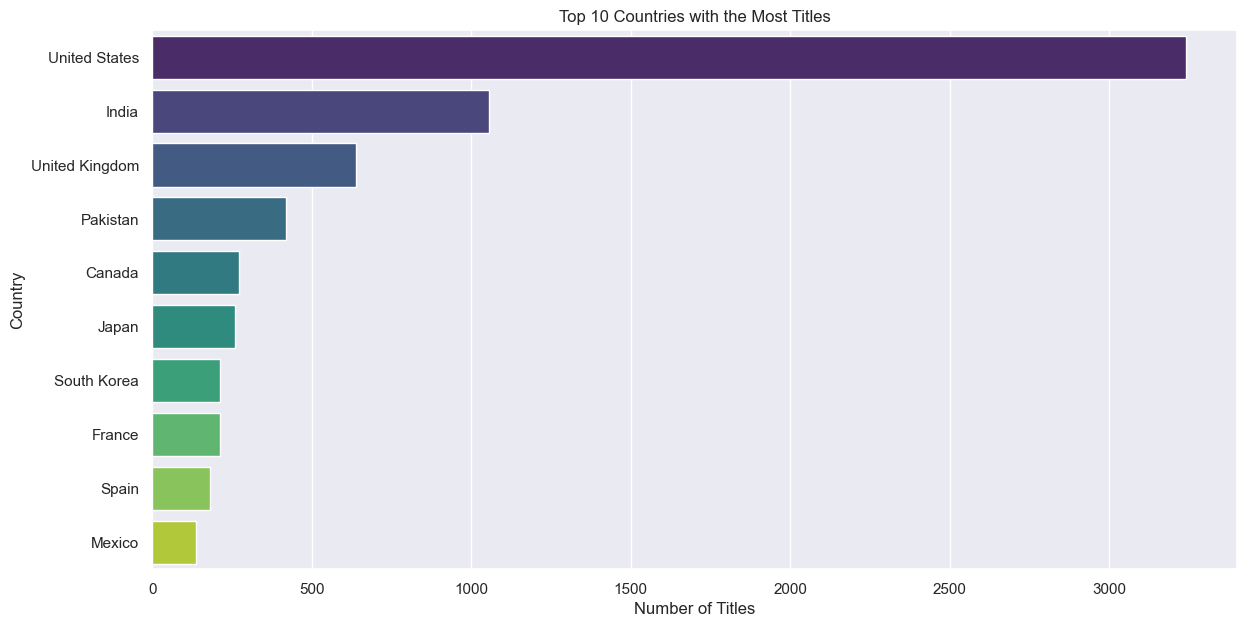

In [18]:
df_filtered = df[df['country'] != 'Not Given']

# Get the top 10 countries with the most titles
top_countries_content = df_filtered['country'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_countries_content.values, y=top_countries_content.index,
            hue = top_countries_content.index,
            palette='viridis') 

plt.title('Top 10 Countries with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

plt.show()